In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [2]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.6/78.2 GB disk)


In [4]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 72.6ms
Speed: 0.7ms pre-process, 72.6ms inference, 806.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference2


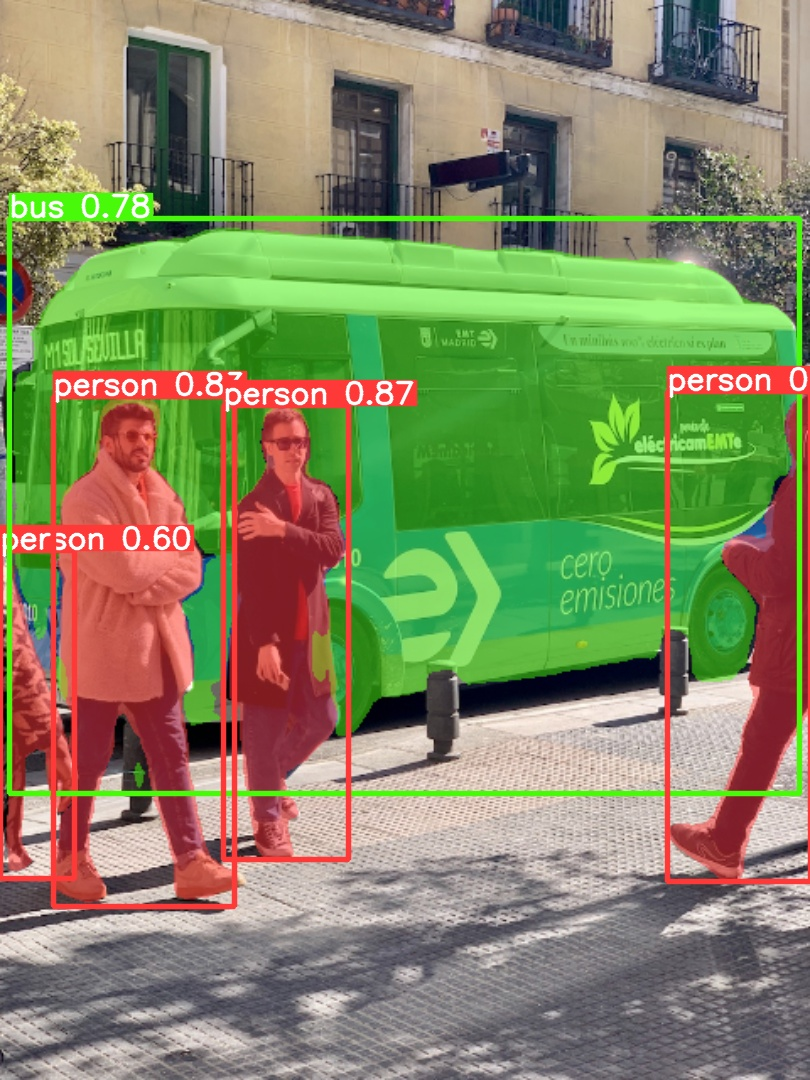

In [5]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

# 2. Infer on COCO image

ERROR ENCOUNTERED


I encountered this specific error: 'HTTPError: 429 Client Error: Unknown Error for url: https://i.imgur.com/EbOBS5l.jpg'. It seems that this error tells that the request to download the image is being blocked, most likely due to too many requests being made in ashort period of time. The status code 429 typically indicates that the rate limit imposed by the server is reached.

Instead of using the image url, I chose to manually download the original image and put it in a folder inside my drive and took the directory of the image to then save it into the yolov5 folder.

In [6]:
#Download example image
'''import requests
image_url = "https://i.imgur.com/EbOBS5l.jpeg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)'''

image_path = '/content/drive/MyDrive/HOA 4.3 Train YOLOv5 Instance Segmentation on Custom Dataset/EbOBS5l.jpeg'
with open(image_path, "rb") as file:
        image_content = file.read()

with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
  handler.write(image_content)


/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 61.7ms
Speed: 0.5ms pre-process, 61.7ms inference, 492.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco2


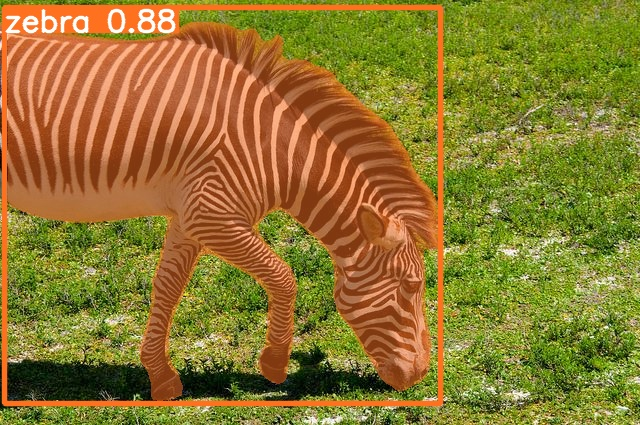

In [7]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [8]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 104MB/s]


replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [9]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:16<00:00,  4.16s/it]
                   all        128        929      0.693       0.65      0.712      0.488      0.675      0.626      0

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [20]:
%cd {HOME}/yolov5
# !pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="kSJutD7ZGfsOr2bagssw")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
version = project.version(61)
dataset = version.download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ASL-Poly-Instance-Seg-61 in yolov5pytorch:: 100%|██████████| 5684/5684 [00:01<00:00, 5445.83it/s]


In [21]:
%cat {dataset.location}/data.yaml

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
roboflow:
  license: Private
  project: asl-poly-instance-seg
  url: https://universe.roboflow.com/paul-guerrie-tang1/asl-poly-instance-seg/dataset/61
  version: 61
  workspace: paul-guerrie-tang1
test: ../test/images
train: ASL-Poly-Instance-Seg-61/train/images
val: ASL-Poly-Instance-Seg-61/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [22]:
dataset.location

'/content/yolov5/ASL-Poly-Instance-Seg-61'

ERROR ENCOUNTERED


I keep getting a FileNotFoundError stating that there is 'No such file or directory: '/content/yolov5/runs/train-seg/custom-dataset/results.png''. This is because I am also getting an IndexError stating that 'boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 4'. This error prevents me from performing the training for 100 epochs. To fix the issue, I just needed to change the dataset I used from the roboflow website.

In [23]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset

/content/yolov5
2024-04-01 12:52:56.965771: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 12:52:56.965821: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 12:52:56.967249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, si

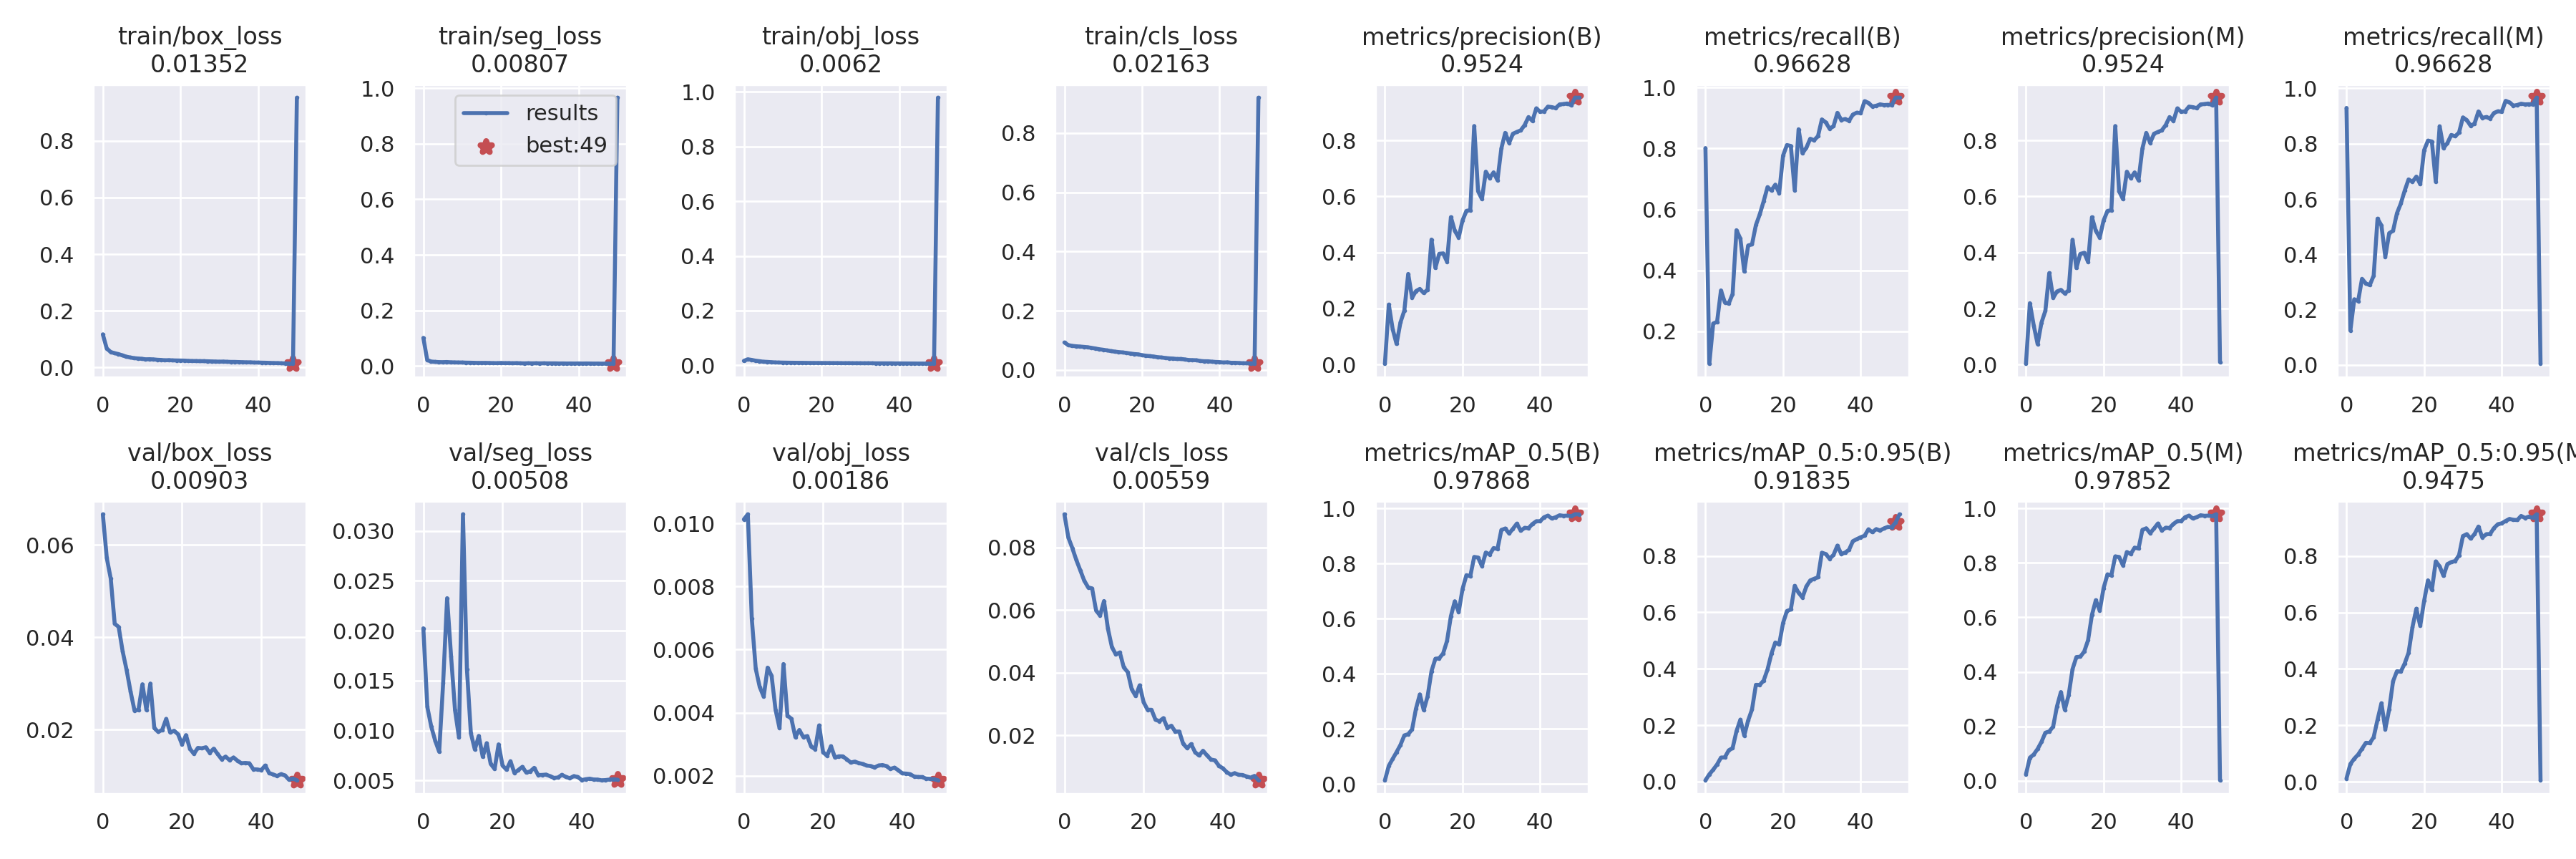

In [25]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [26]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-61/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-61/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:09<00:00,  1.10it/s]
                   all        334        33

### Infer With Your Custom Model

In [27]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

In [28]:
%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom-dataset

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-61/test/images/J29_jpg.rf.e411f754895e3c9a5013adc23a05afbd.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-61/test/images/J29_jpg.rf.e411f754895e3c9a5013adc23a05afbd.jpg: 320x320 1 J, 6.7m

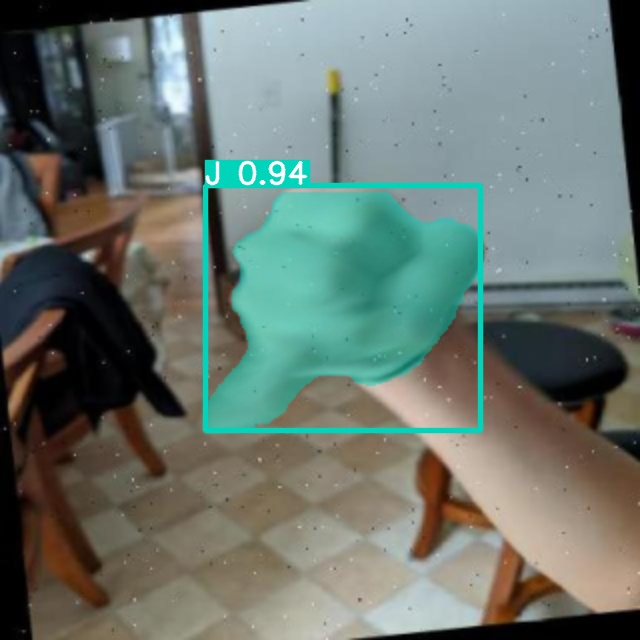

In [29]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [36]:
import requests

In [37]:
example_image_dir = "../example_images"
os.makedirs(example_image_dir, exist_ok=True)
img_url_1 = 'https://static3.depositphotos.com/1003004/153/i/380/depositphotos_1536349-stock-photo-asl-letter-n.jpg'

response = requests.get(img_url_1)
response.raise_for_status()
with open(os.path.join(example_image_dir,f'example_1.jpg'), 'wb') as handler:
  handler.write(response.content)

In [40]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3 /content/example_images/example_0.jpg: 320x320 1 N, 7.2ms
image 2/3 /content/example_images/example_1.jpg: 320x320 1 N, 9.2ms
image 3/3 /content/example_images/example_2.jpg: 320x288 1 K, 97.6ms
Speed: 0.3ms pre-process, 38.0ms inf

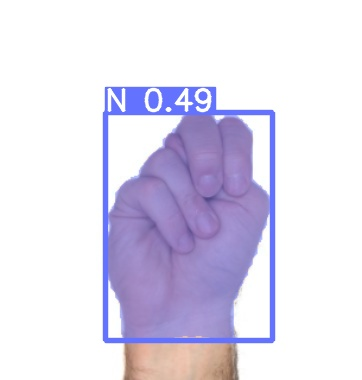

In [41]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/exp5/example_1.jpg", width=600)

In [43]:
img_url_1 = 'https://static3.depositphotos.com/1003004/153/i/380/depositphotos_1536346-stock-photo-asl-letter-m.jpg'

response = requests.get(img_url_1)
response.raise_for_status()
with open(os.path.join(example_image_dir,f'example_1.jpg'), 'wb') as handler:
  handler.write(response.content)

In [44]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
image 1/3 /content/example_images/example_0.jpg: 320x320 1 N, 6.8ms
image 2/3 /content/example_images/example_1.jpg: 320x320 1 M, 1 N, 7.3ms
image 3/3 /content/example_images/example_2.jpg: 320x288 1 K, 61.2ms
Speed: 0.3ms pre-process, 25.1ms inference, 161.7ms NMS per image at shap

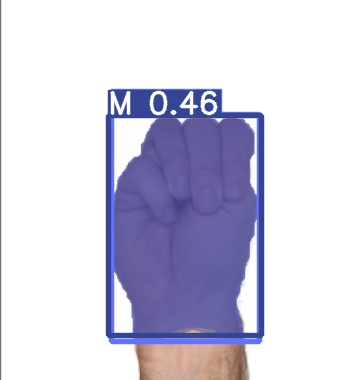

In [45]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/exp6/example_1.jpg", width=600)

In [46]:
img_url_1 = 'https://static3.depositphotos.com/1003004/153/i/380/depositphotos_1536377-stock-photo-asl-letter-v.jpg'

response = requests.get(img_url_1)
response.raise_for_status()
with open(os.path.join(example_image_dir,f'example_1.jpg'), 'wb') as handler:
  handler.write(response.content)

In [47]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3 /content/example_images/example_0.jpg: 320x320 1 N, 6.5ms
image 2/3 /content/example_images/example_1.jpg: 320x288 1 K, 93.5ms
image 3/3 /content/example_images/example_2.jpg: 320x288 1 K, 9.4ms
Speed: 0.3ms pre-process, 36.5ms inf

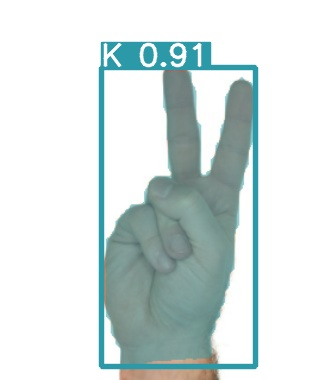

In [48]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/exp7/example_1.jpg", width=600)

In [81]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images2"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://media.istockphoto.com/id/168623703/photo/letter-b-in-american-sign-language.jpg?s=612x612&w=0&k=20&c=p_buMxVO_OAqOo4PURYb0i2Yg3ZHzIppEYvYNUmysCg=",
    "https://www.shutterstock.com/image-photo/letter-c-using-american-sign-600nw-134773025.jpg",
    "https://media.istockphoto.com/id/473105208/photo/the-letter-h-using-american-sign-language.jpg?s=612x612&w=0&k=20&c=IZ3JEc98gUYqSt0mfVbW4stNQWs3dv_J-LHp--bx49c=",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [82]:
#Infer On Directory
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=../example_images2, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/3 /content/example_images2/example_0.jpg: 320x224 1 B, 62.4ms
image 2/3 /content/example_images2/example_1.jpg: 320x320 1 C, 7.6ms
image 3/3 /content/example_images2/example_2.jpg: 224x320 1 H, 56.2ms
Speed: 0.3ms pre-process, 42.1m

In [83]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp12/labels")):
  with open(os.path.join("runs/predict-seg/exp12/labels",txt_file), 'r') as fid:
    for line in fid:
      label, *x, conf = line.strip().split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

In [84]:
for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp12/labels")):
  display.Image(filename=f"/content/yolov5/runs/predict-seg/exp12/example_{i}.jpg", width=600)

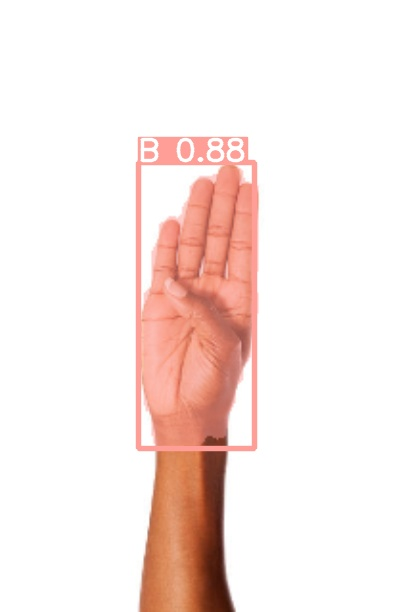

In [85]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp12/example_0.jpg", width=600)

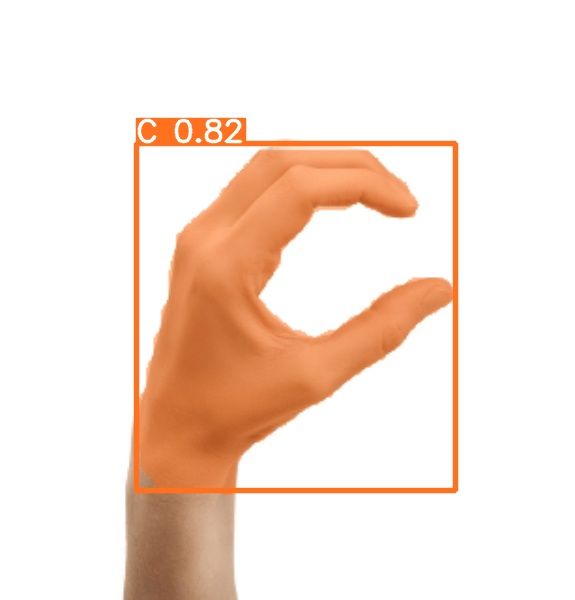

In [86]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp12/example_1.jpg", width=600)

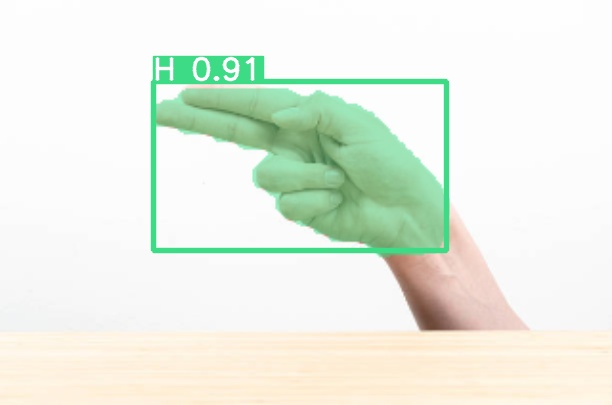

In [87]:
display.Image(filename=f"/content/yolov5/runs/predict-seg/exp12/example_2.jpg", width=600)

# Conclusion

This activity is all about instance segmentation utilizing the YOLOv5 model on a custom dataset. Instance segmentation is a technique for detection, segmentation, and classification of every individual object in an image. In this case, it is used to detect, segment, and classify different sign language letters in an image. At first, I had a hard time in training the dataset used in this activity, but I was able to start training the data by correctly using the needed dataset that can be exported in the roboflow website. For the result of the training of the dataset, I got high results for both the mean average precision 50 and 50-95. In validating if the images were being properly segmented, I got high confidence scores for most of the validation that I had done. The lowest score I got was 0.46 and the highest score is 0.94. Overall, this activity has given me some information regarding the use of instance segmentation specifically using the YOLOv5 model on custom dataset.